In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Uploading Dataset

In [3]:
df =pd.read_csv('/content/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df1=df.copy()

In [14]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [15]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
df1.loc[df['Type']==1,'Type'] = 'building_windows_float_processed'
df1.loc[df['Type']==2,'Type'] = 'building_windows_non_float_processed'
df1.loc[df['Type']==3,'Type'] = 'vehicle_windows_float_processed'
df1.loc[df['Type']==4,'Type'] = 'vehicle_windows_non_float_processed'
df1.loc[df['Type']==5,'Type'] = 'containers'
df1.loc[df['Type']==6,'Type'] = 'tableware'
df1.loc[df['Type']==7,'Type'] = 'headlamps'

In [6]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


Discriptive Analysis

In [7]:
df1.isnull().sum() #no missing data

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df1.describe()  #by analysing the statistics we can say that there might be some outliers present in the data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Text(0.5, 1.0, 'Histogram of Classes')

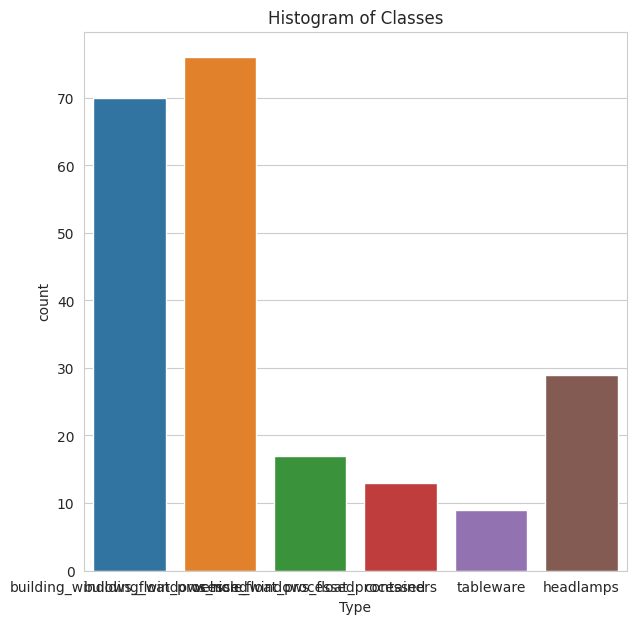

In [24]:
sns.set_style('whitegrid')
sns.countplot(data=df1,x='Type')
ax = plt.gca()
ax.set_title("Histogram of Classes")

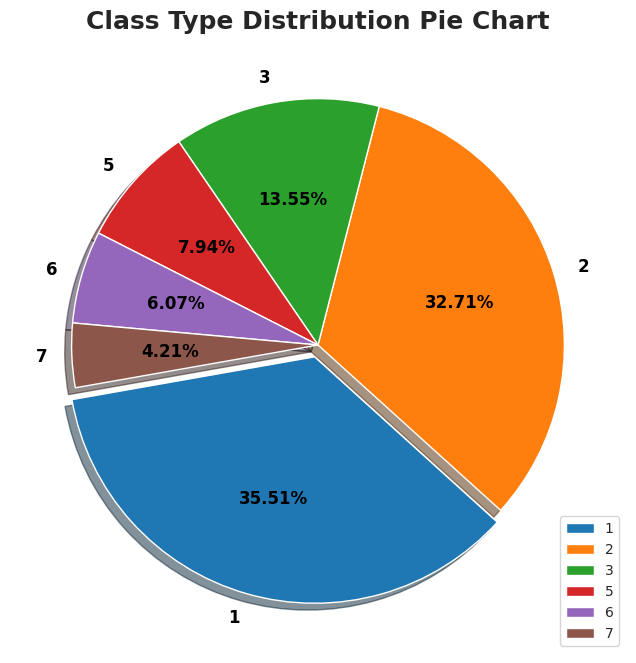

In [29]:
plt.figure(figsize = (12,8))
plt.pie(df['Type'].value_counts(),
       labels=df.Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'lower right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

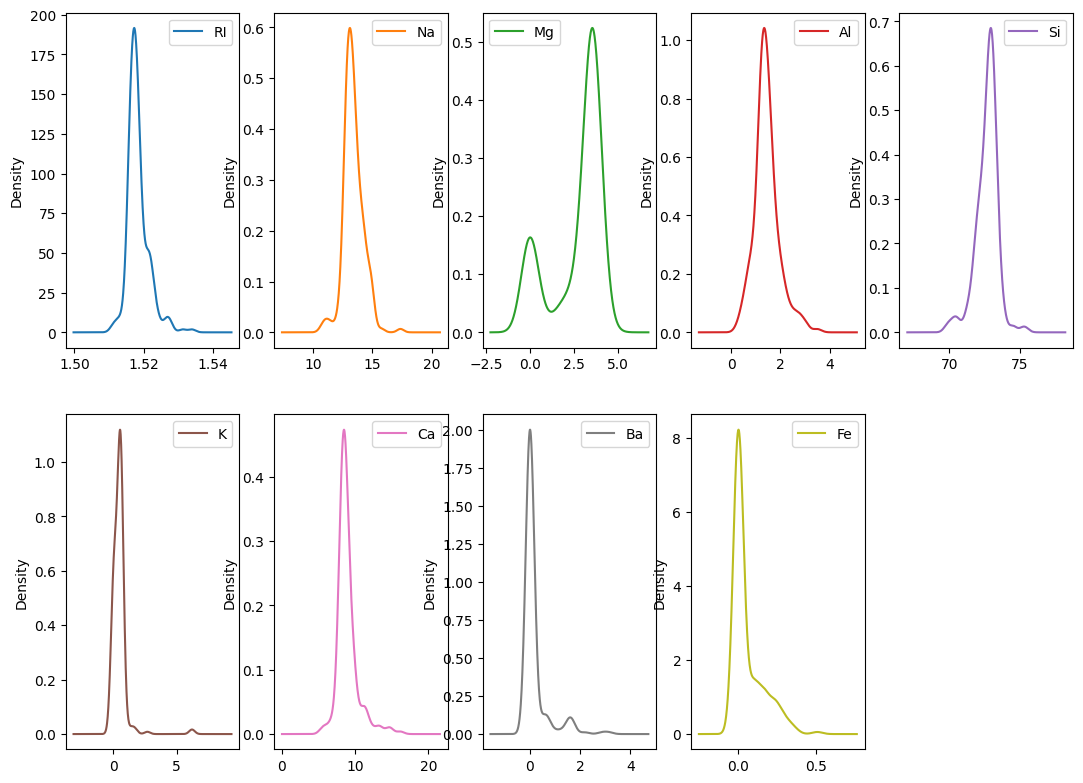

In [12]:
df1.plot(kind='density',subplots=True,layout=(4,5),figsize=(13,20),sharex=False,sharey=False)
plt.show()

Outliers Detection

<Axes: >

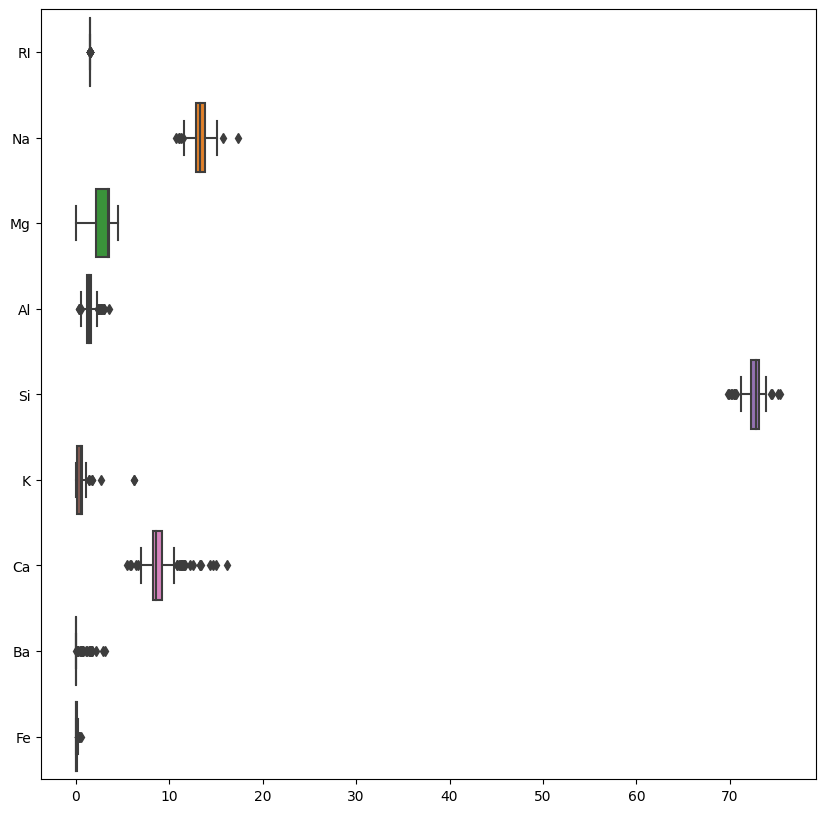

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df1,orient='h')

<Figure size 800x800 with 0 Axes>

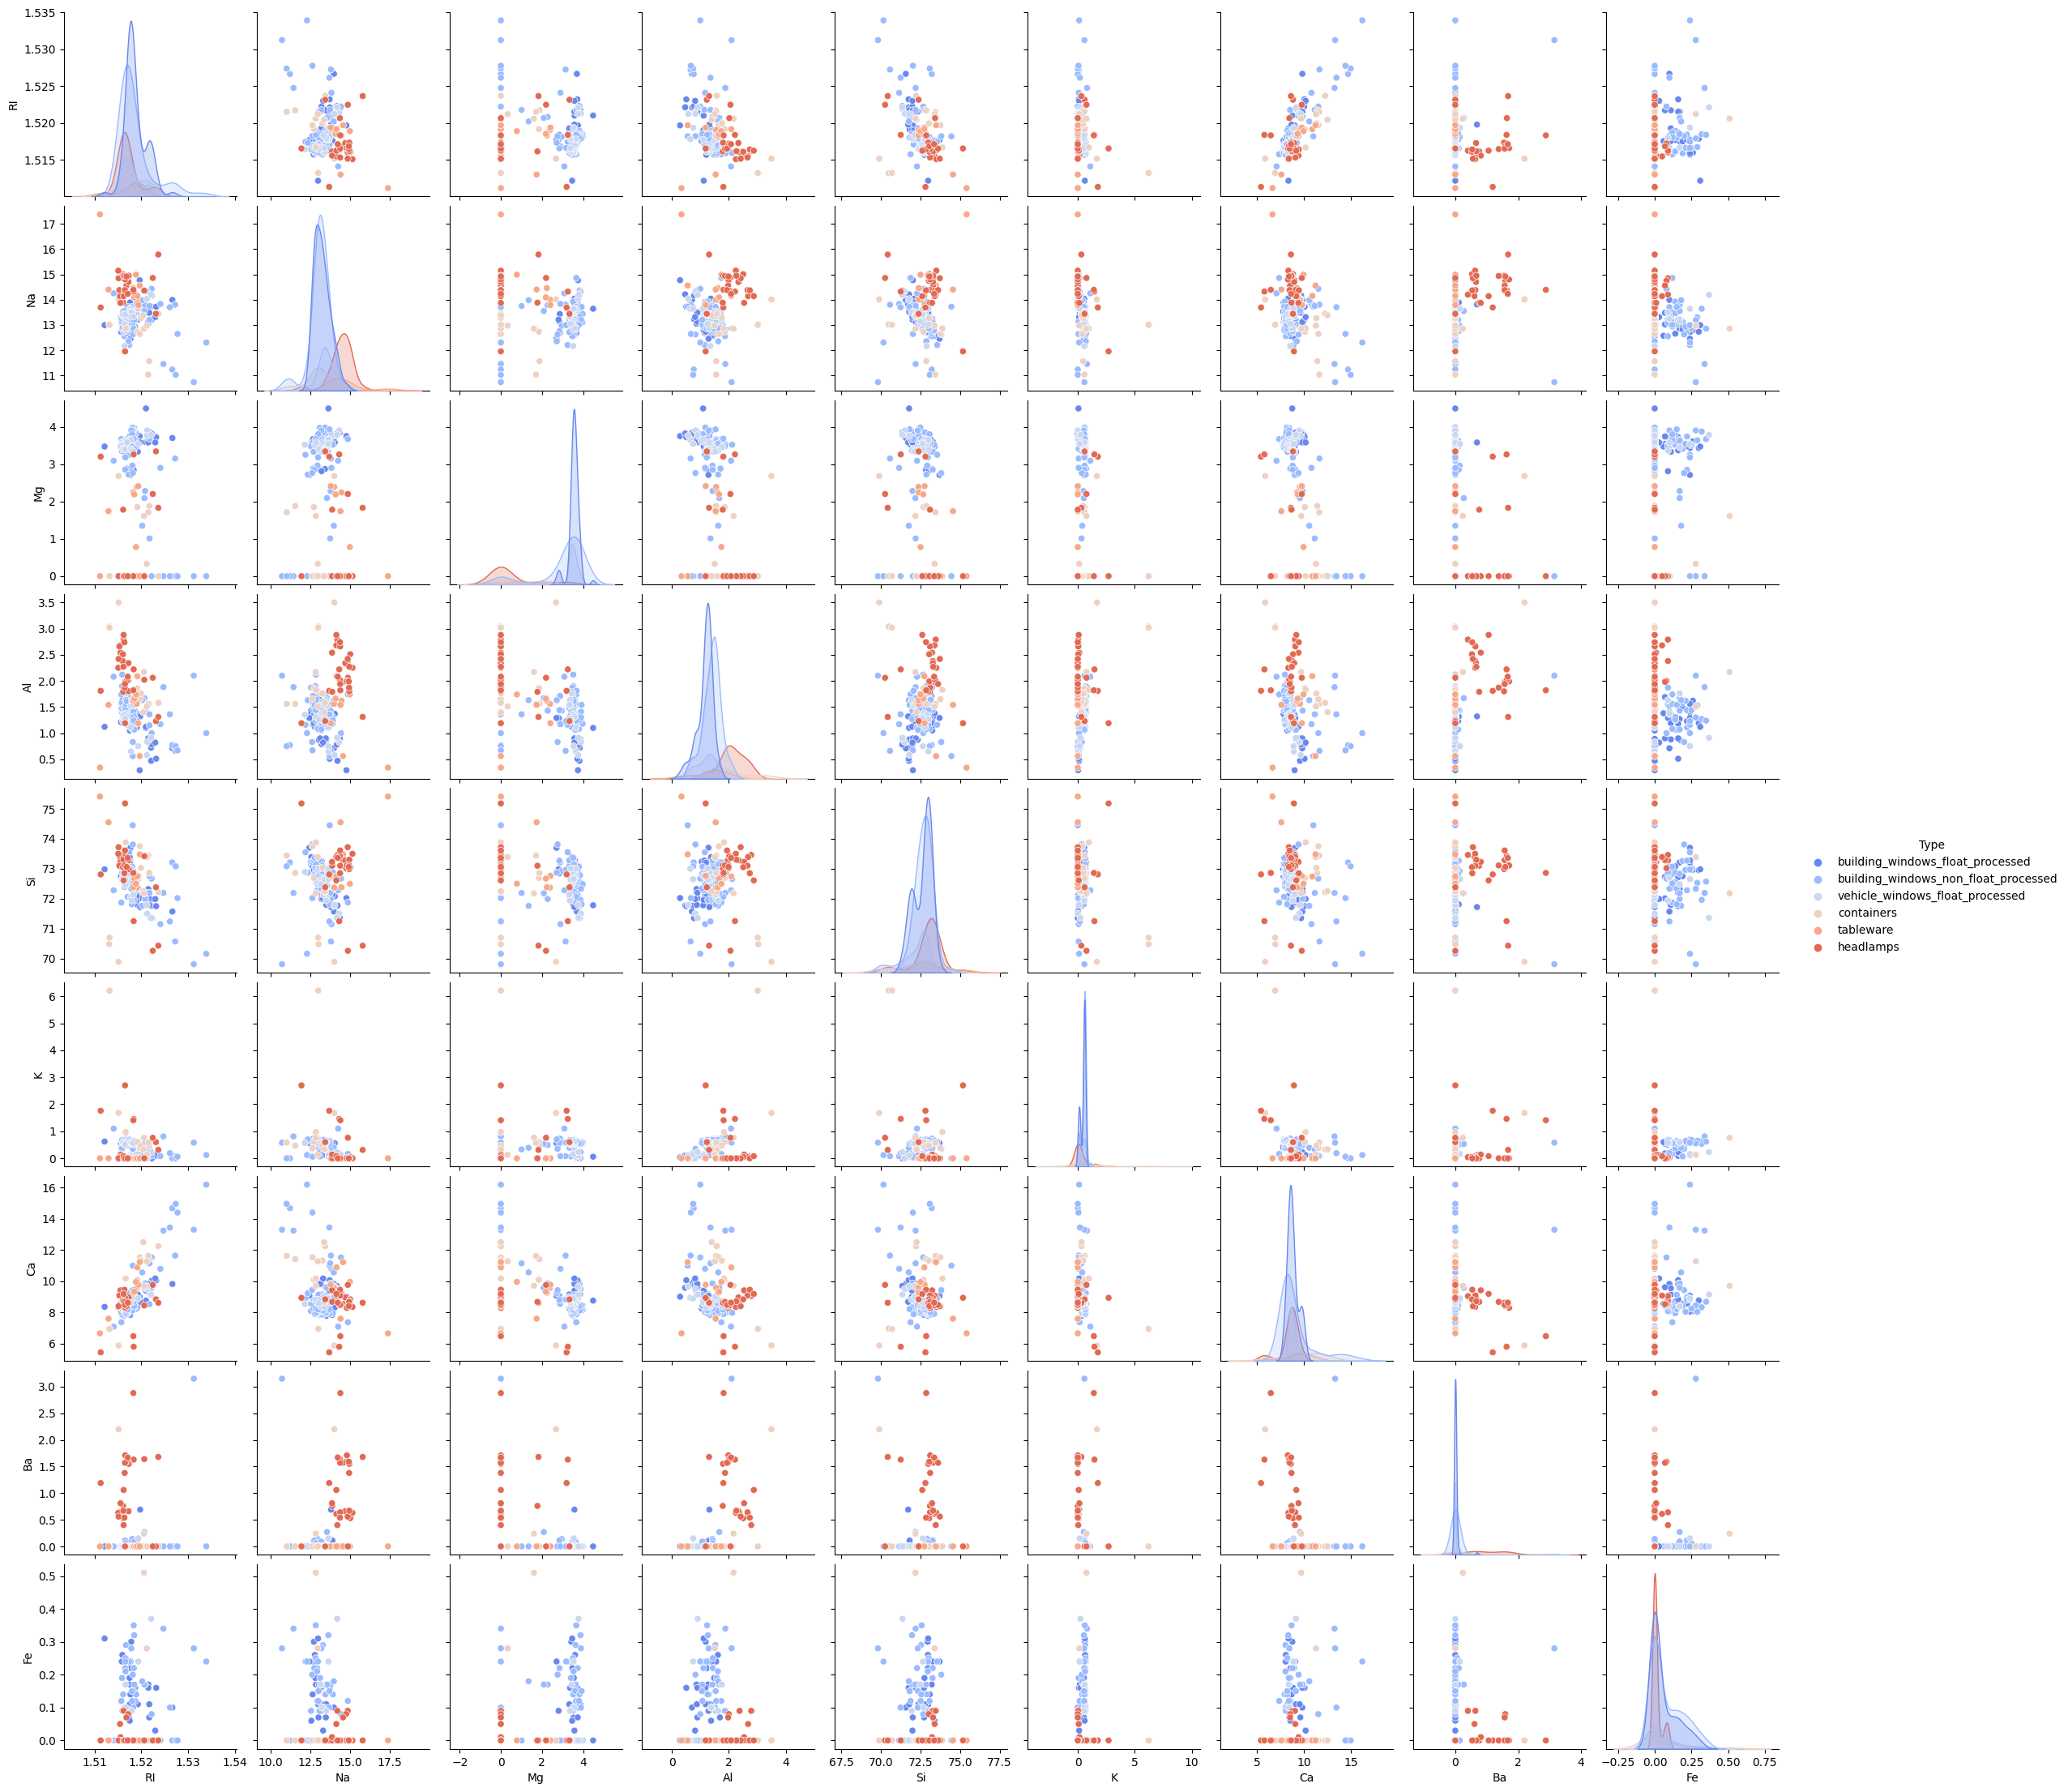

In [18]:
plt.figure(figsize=(8,8))
sns.pairplot(df1,hue ='Type', palette='coolwarm')
plt.show()

<Axes: >

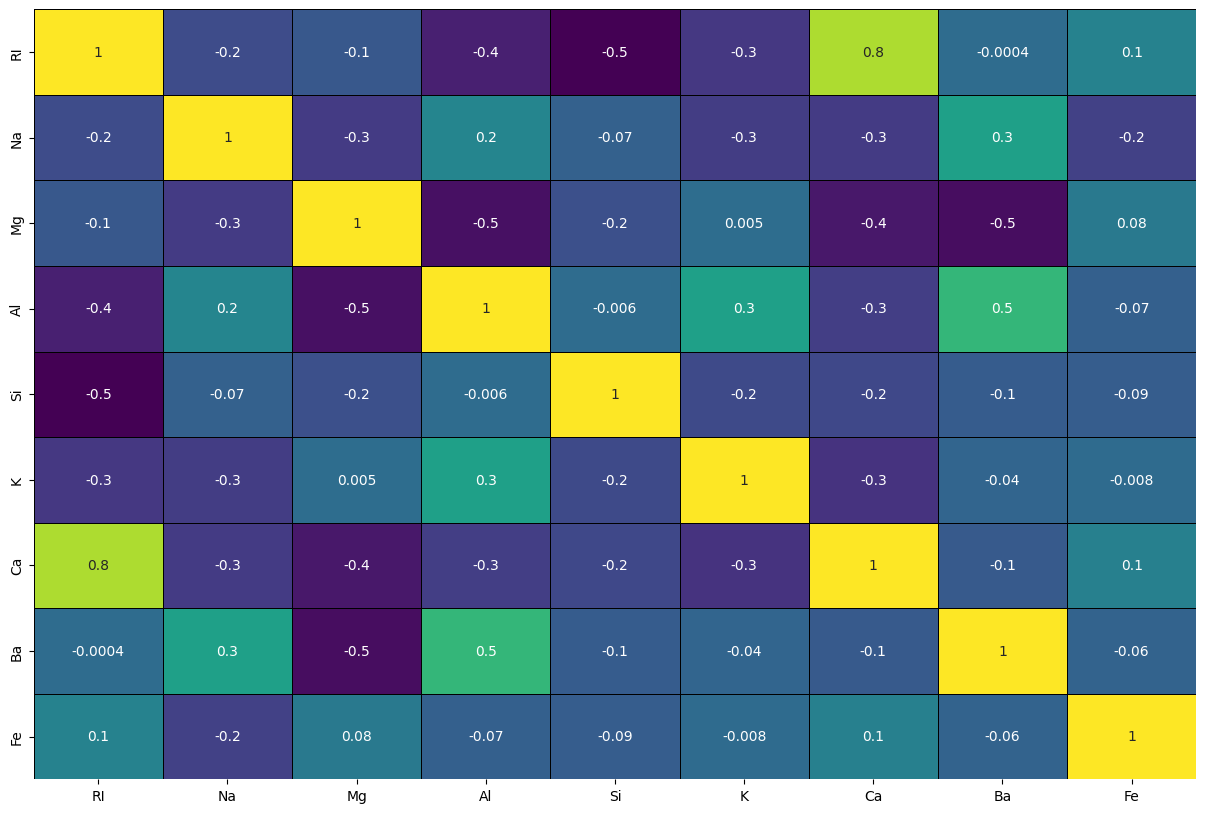

In [19]:
#Correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Train test split

In [30]:
X = np.array(df1.iloc[:,3:5])
Y = np.array(df1['Type'])

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [35]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [36]:
for i, k in enumerate(k_values):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  train_accuracy.append(knn.score(X_train,Y_train))
  test_accuracy.append(knn.score(X_test,Y_test))

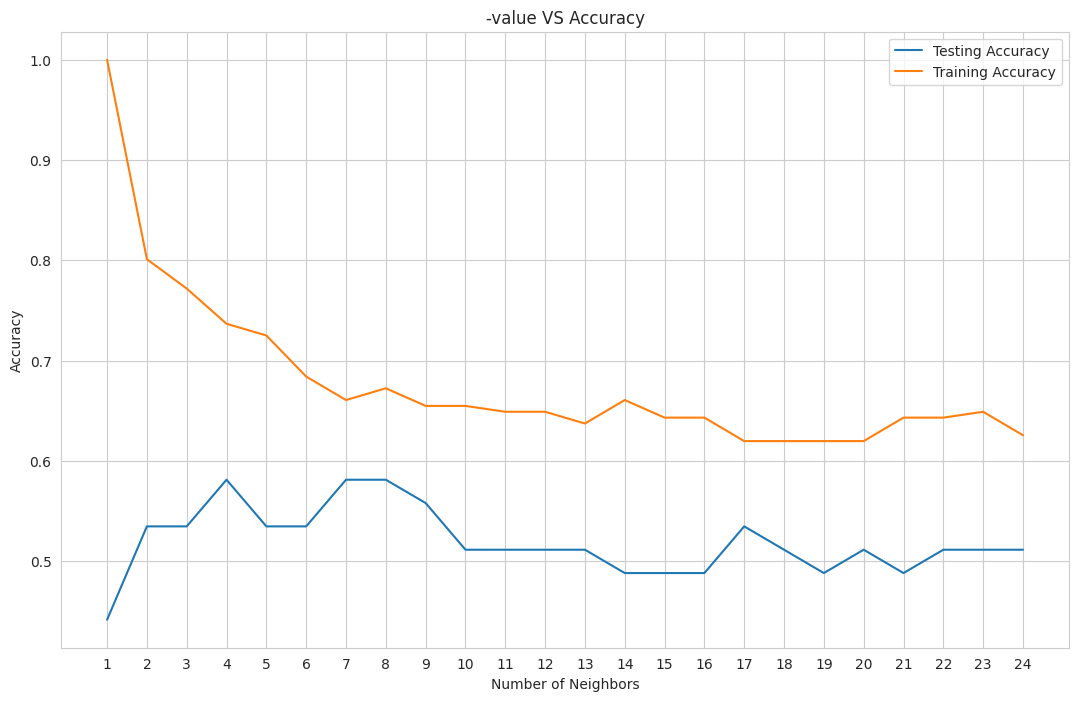

In [37]:
plt.figure(figsize=(13,8))
plt.plot(k_values,test_accuracy, label='Testing Accuracy')
plt.plot(k_values,train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

Taking k=4

**APPLYING THE ALGORITHM**

In [38]:
Knn = KNeighborsClassifier(n_neighbors=4)

In [39]:
knn.fit(X_train,Y_train)
pred_y = knn.predict(X_test)

In [40]:
score = accuracy_score(pred_y,Y_test)
score

0.5116279069767442

In [41]:
score_knn = cross_val_score(knn,X,Y,cv=10)

In [43]:
score_knn.mean()

0.5428571428571429

In [44]:
score_knn.std()*2

0.18732937802575617

In [45]:
cv_score = score_knn.mean()
cv_score

0.5428571428571429

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(Y_test,pred_y))
print('\n')
print(classification_report(Y_test,pred_y))

WITH K=4


[[11  3  0  0  0  0]
 [ 7  8  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 1  2  0  3  0  0]
 [ 0  2  0  0  0  0]
 [ 0  3  0  0  0  0]]


                                      precision    recall  f1-score   support

    building_windows_float_processed       0.58      0.79      0.67        14
building_windows_non_float_processed       0.38      0.53      0.44        15
                          containers       0.00      0.00      0.00         3
                           headlamps       1.00      0.50      0.67         6
                           tableware       0.00      0.00      0.00         2
     vehicle_windows_float_processed       0.00      0.00      0.00         3

                            accuracy                           0.51        43
                           macro avg       0.33      0.30      0.30        43
                        weighted avg       0.46      0.51      0.47        43

